# 1.라이브러리 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/데이터분석_프로젝트/ai_factory/data_set")
os.getcwd()

'/content/drive/MyDrive/데이터분석_프로젝트/ai_factory/data_set'

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['dark_background'])

# 2. 데이터 불러오기

In [4]:
train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")
sub_df = pd.read_csv("answer_sample.csv")

In [5]:
test_df = pd.read_csv("test_data.csv")

# 3. motor vibe 보정

In [6]:
# monitor vibe 보정
type_1 = train_df[train_df["type"] == 1]
outlier_index = type_1[type_1["motor_vibe"] > 15].index
outlier = train_df.iloc[outlier_index]["motor_temp"] / 20
outlier = outlier.values
train_df.loc[outlier_index, "motor_vibe"] = outlier

# 4. 스케일링

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [8]:
scaler =  MinMaxScaler()

# 타입별로 minmax scaling 진행
def minmax_cat (tr_df, te_df, i) :

    tr_df = train_df[train_df["type"] == i].copy()
    te_df = test_df[test_df["type"] == i].copy()
    
    tr_df.drop("type", axis = 1, inplace = True)
    te_df.drop("type", axis = 1, inplace = True)

    #scaler.fit(tr_df)

    st_train_df = scaler.fit_transform(tr_df)
    st_test_df = scaler.fit_transform(te_df)

    st_train_df = pd.DataFrame(st_train_df, columns =  tr_df.columns)
    st_test_df = pd.DataFrame(st_test_df, columns = te_df.columns)

    return st_train_df, st_test_df

In [9]:
# 각각 변수에 저장
for i in range(0, 8) :
    globals()["st_tr_df_{}".format(i)], globals()["st_te_df_{}".format(i)]  =  minmax_cat(train_df, test_df, i)

In [10]:
scaled_train_df = pd.concat([st_tr_df_0,st_tr_df_1,st_tr_df_2,st_tr_df_3,st_tr_df_4,st_tr_df_5,st_tr_df_6,st_tr_df_7], axis = 0)
scaled_test_df = pd.concat([st_te_df_0,st_te_df_1,st_te_df_2,st_te_df_3,st_te_df_4,st_te_df_5,st_te_df_6,st_te_df_7], axis = 0)

## motor_vibe 보정

In [11]:
scaled_train_df.reset_index(inplace  = True)
scaled_test_df.reset_index(inplace  = True)

In [12]:
scaled_train_df.drop("index", axis = 1, inplace = True)
scaled_test_df.drop("index", axis = 1, inplace = True)

In [13]:
scaled_train_df["type"] = train_df["type"].values
scaled_test_df["type"] = test_df["type"].values

## index 확인

In [14]:
scaled_train_df.loc[outlier_index]

air_inflow  air_end_temp  out_pressure  motor_current  motor_rpm  \
581    0.157534      0.183377           0.0       0.141104   0.121483   
582    0.342466      0.363127           0.0       0.326097   0.307332   
583    0.445205      0.458773           0.0       0.424257   0.406223   
584    0.232877      0.253958           0.0       0.213780   0.194373   
585    0.821918      0.820251           0.0       0.795658   0.780051   
586    0.308219      0.330475           0.0       0.292591   0.273657   
587    0.410959      0.427441           0.0       0.392166   0.373828   
588    0.184932      0.208773           0.0       0.167532   0.147911   
589    0.589041      0.599604           0.0       0.569136   0.552003   
590    0.684932      0.687005           0.0       0.658801   0.642370   
591    0.294521      0.312335           0.0       0.273714   0.254902   
592    0.232877      0.254947           0.0       0.214724   0.195652   
593    0.472603      0.483839           0.0       0.449740   0.432225   
594    0.472603      0.483509           0.0       0.449740   0.431799   
595    0.746575      0.748681           0.0       0.721567   0.705882   
596    0.958904      0.952177           0.0       0.931100   0.916454   

     motor_temp  motor_vibe  type  
581    0.190986    0.255674     1  
582    0.370151    0.427660     1  
583    0.465091    0.518794     1  
584    0.261175    0.323050     1  
585    0.825268    0.864539     1  
586    0.337643    0.396454     1  
587    0.434060    0.489007     1  
588    0.216476    0.280142     1  
589    0.605467    0.653546     1  
590    0.692649    0.737234     1  
591    0.319542    0.379078     1  
592    0.262283    0.324113     1  
593    0.490211    0.542908     1  
594    0.489841    0.542553     1  
595    0.753602    0.795745     1  
596    0.956409    0.990426     1

# 4. 시각화

In [15]:
scaled_train_df.reset_index(inplace  = True)
scaled_test_df.reset_index(inplace  = True)

In [16]:
# 한번에 시각화하는 함수
def show_data(df, columns, start = 0, end = 100) :
    plt.figure(figsize=(64,5))
    for i, column in  enumerate(columns, start = 0) :
        #n_df = df.reset_index()
        plt.xticks(df.index, rotation = 90)
        #plt.xticklabels(df.index, rotation = 90)
        sns.lineplot(data = df.drop("type", axis = 1)[start : end], x = "index", y = column, label =column)

In [17]:
# train data 시각화
for i in range(8) :
    ty_df = scaled_train_df[scaled_train_df["type"] == i]
    show_data(ty_df, ty_df.drop(["type","index"], axis = 1).columns, start = 0, end = -1)

Output hidden; open in https://colab.research.google.com to view.

In [18]:
# testdata 시각화
for i in range(8) :
    ty_df = scaled_test_df[scaled_test_df["type"] == i]
    show_data(ty_df, ty_df.drop(["type","index"], axis = 1).columns, start =  200 , end = 700)

Output hidden; open in https://colab.research.google.com to view.

## 타입별 한줄식 보기

## type 0 

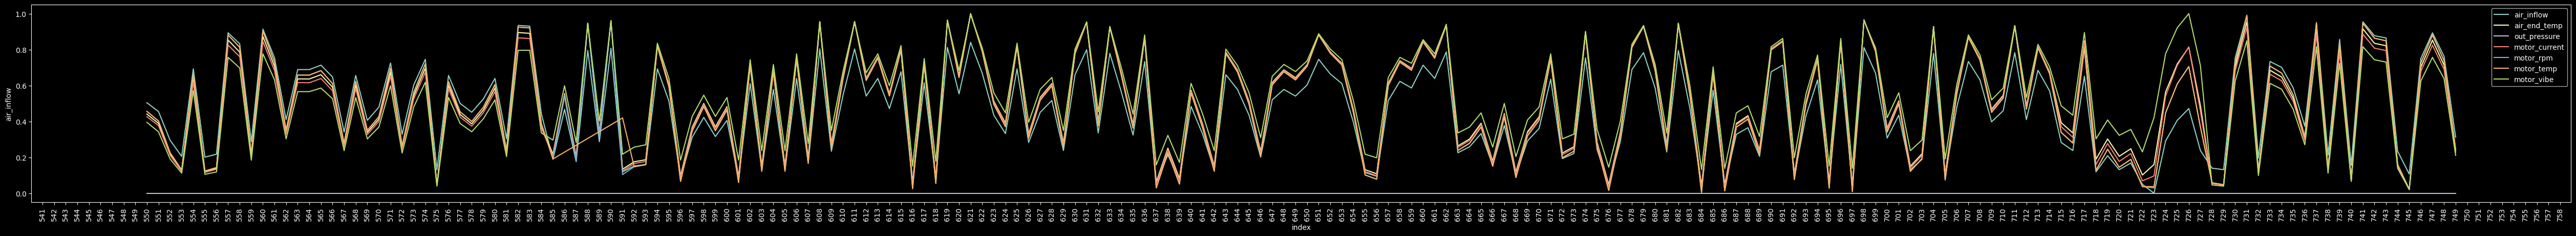

In [19]:
# type 0
show_data(scaled_test_df[scaled_test_df["type"] == 0], ty_df.drop(["type","index"], axis = 1).columns, start =  550 , end = 750)

In [20]:
# 584 - 727

In [21]:
144

144

In [22]:
test_df["label"] = 0

In [23]:
test_df.iloc[584] = 0 

In [24]:
test_df.iloc[584: 727] = 1 

In [25]:
pd.set_option("display.max_rows", 8000)

## type 2

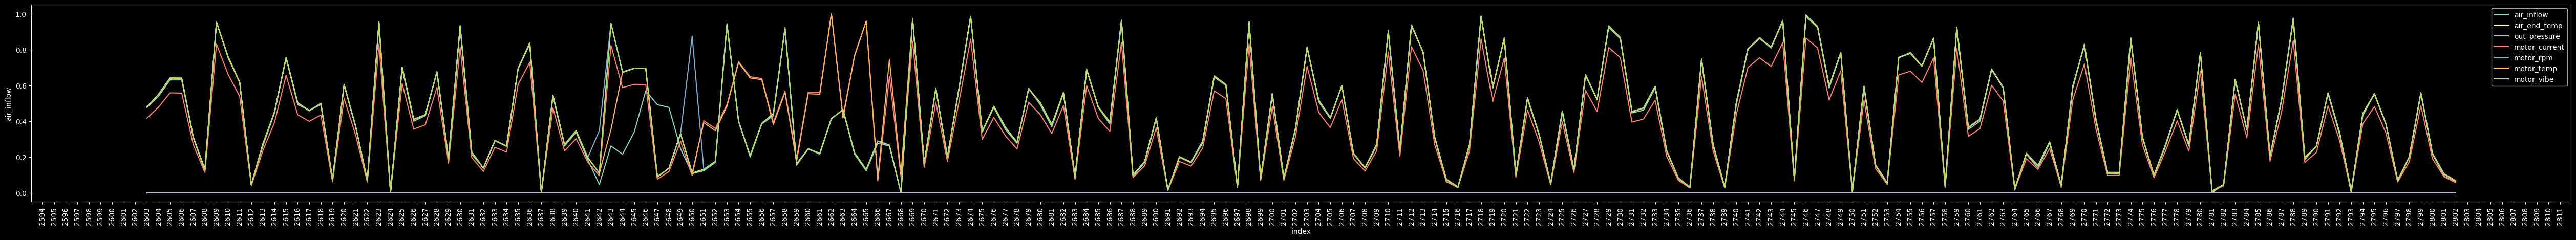

In [26]:
# type 2
show_data(scaled_test_df[scaled_test_df["type"] == 2], ty_df.drop(["type","index"], axis = 1).columns, start =  200, end = 400)

In [27]:
2641 - 2668

-27

In [28]:
27

27

In [29]:
test_df.iloc[2641 : 2668] = 1

## type 3

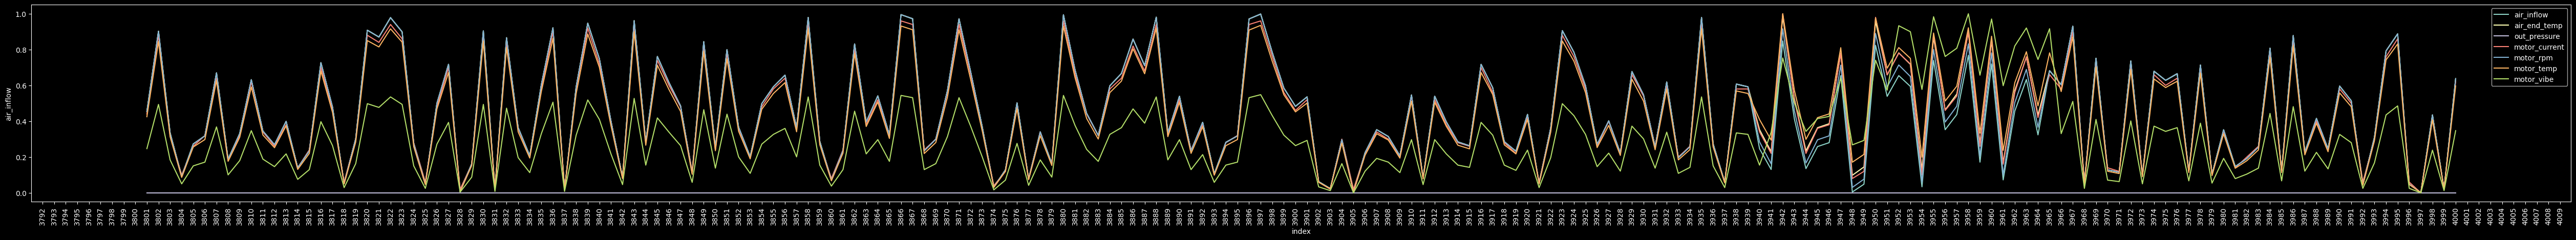

In [49]:
# type 3
show_data(scaled_test_df[scaled_test_df["type"] == 3], ty_df.drop(["type","index"], axis = 1).columns, start =  300, end = 500)

In [31]:
3951 - 3966

-15

In [32]:
3939 - 3965 

-26

In [33]:
26

26

In [34]:
test_df.iloc[3939 : 3965] = 1 

## type 4

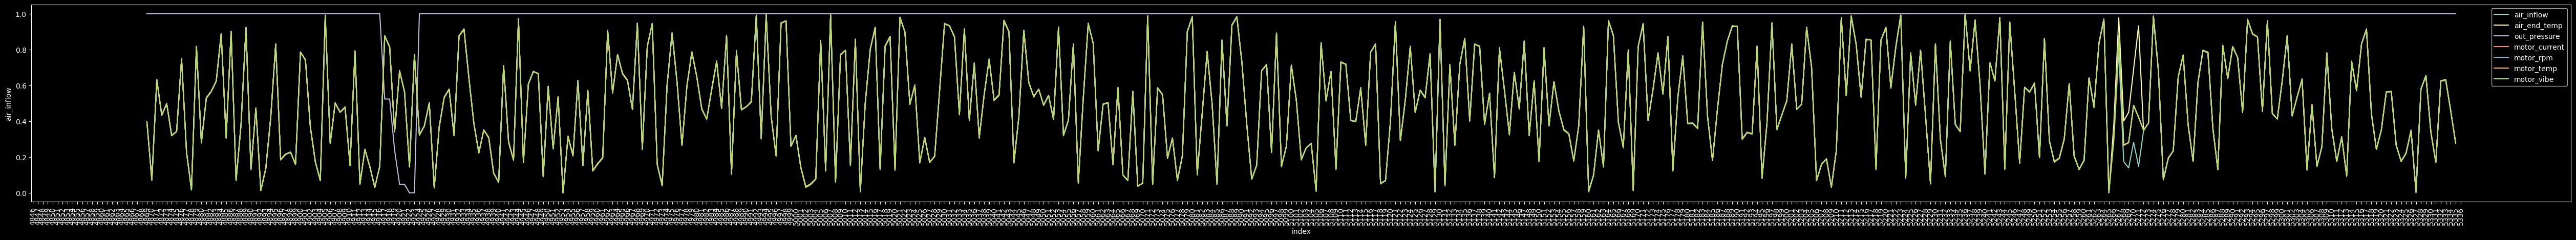

In [35]:
# type 4
show_data(scaled_test_df[scaled_test_df["type"] == 4], ty_df.drop(["type","index"], axis = 1).columns, start =  450, end = -1)

In [36]:
#4917- 4925 5268 - 5271

In [37]:
test_df.iloc[4917 : 4925] = 1

In [38]:
test_df.iloc[5268 : 5271] = 1 

In [39]:
test_df.iloc[5268 : 5271] = 1 

## type 5

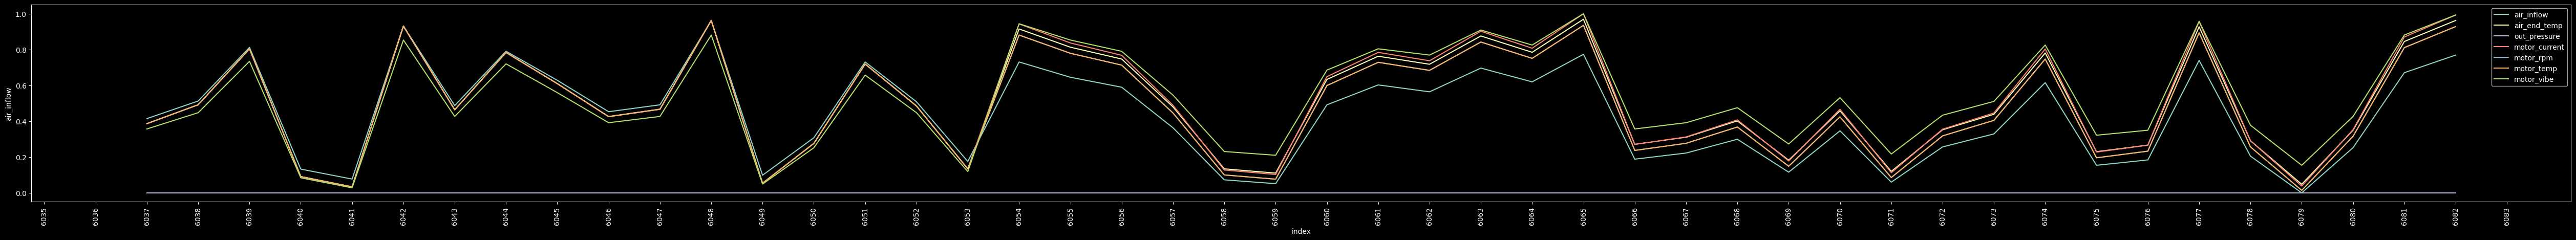

In [40]:
# type 5
show_data(scaled_test_df[scaled_test_df["type"] == 5], ty_df.drop(["type","index"], axis = 1).columns, start =  700, end = -1)

In [41]:
6053 - 6083

-30

In [42]:
29

29

In [43]:
test_df.iloc[6053 : 6083] = 1

## type 6

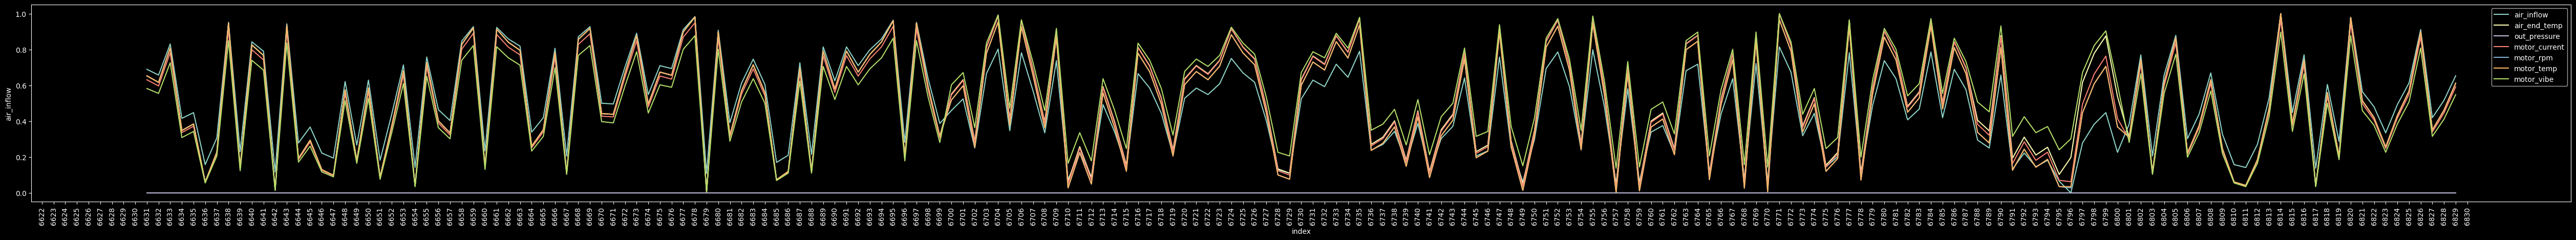

In [44]:
# type 6
show_data(scaled_test_df[scaled_test_df["type"] == 6], ty_df.drop(["type","index"], axis = 1).columns, start =  -200, end = -1)

In [45]:
6700 - 6801

-101

In [46]:
101

101

In [47]:
test_df.iloc[6700 : 6801] = 1 

## type 7

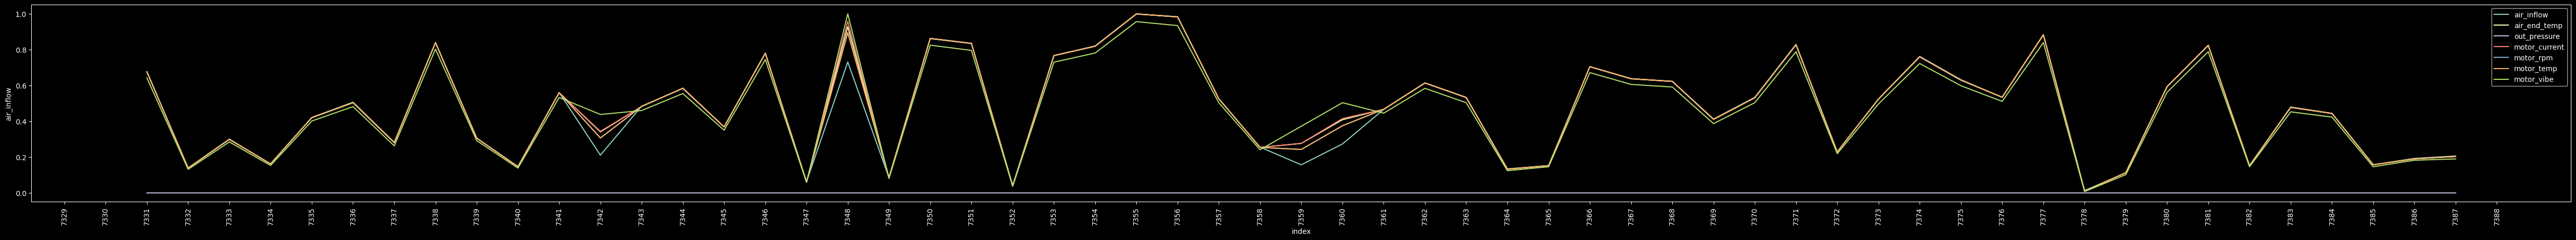

In [48]:
# type 7
show_data(scaled_test_df[scaled_test_df["type"] == 7], ty_df.drop(["type","index"], axis = 1).columns, start =  500, end = -1)

In [ ]:
#7341 7343    7347- 7349     7358-7361

SyntaxError: ignored

In [ ]:
#7

In [ ]:
test_df.iloc[7341 : 7343] = 1

In [ ]:
test_df.iloc[7347 : 7349] = 1

In [ ]:
test_df.iloc[7358 : 7361] = 1


In [ ]:
test_df.iloc[735 : 7361] = 1

## 예측 데이터와 비교

In [50]:
pred_data = pd.read_csv("/content/drive/MyDrive/데이터분석_프로젝트/ai_factory/data_set/pred_data.csv")

In [54]:
pred_data["label"].loc[3837]

0

In [55]:
pred_data["label"].loc[3831] = 1

In [56]:
pred_data["label"].loc[3837] = 1

In [57]:
pred_data["label"].iloc[3830 : 3840]

3830    0
3831    1
3832    0
3833    0
3834    0
3835    0
3836    0
3837    1
3838    0
3839    0
Name: label, dtype: int64

In [ ]:
pred_data["label"].iloc[7342] = 0

In [ ]:
pred_data["label"].iloc[7348] = 0

In [ ]:
pred_data.iloc[3951 : 3958] 

Unnamed: 0  type  label
3951        3951     3      0
3952        3952     3      0
3953        3953     3      0
3954        3954     3      0
3955        3955     3      0
3956        3956     3      0
3957        3957     3      0

In [ ]:
pred_data["label"].iloc[3951 : 3958] = 0

In [ ]:
plt.figure(figsize=(50,10))
plt.subplot(2,1,1)
plt.plot(test_df['label'][:], label='cu')
plt.subplot(2,1,2)
plt.plot(pred_data['label'][:], label='ok')
plt.show

In [ ]:
print(f1_score(test_df['label'], pred_data['label'], average = "macro"))

In [ ]:
from sklearn.metrics import classification_report, f1_score

In [ ]:
print(classification_report(test_df['label'], pred_data['label']))

# 정상 변경후 비교 

In [ ]:
# out_pressure
test_df.iloc[4917 : 4925] = 0

In [ ]:
test_df.iloc[5268 : 5271] = 1

In [ ]:
# type 5
test_df.iloc[6053 : 6082] = 0

In [ ]:
# type 7
test_df.iloc[7341 : 7343] = 0
test_df.iloc[7347 : 7349] = 0
test_df.iloc[7358 : 7361] = 0 

In [ ]:
plt.figure(figsize=(50,10))
plt.subplot(2,1,1)
plt.plot(test_df['label'][:], label='cu')
plt.subplot(2,1,2)
plt.plot(pred_data['label'][:], label='ok')
plt.show

In [ ]:
print(f1_score(test_df['label'], pred_data['label'], average = "macro"))

In [ ]:
pred_data["label"].iloc[6054 : 6060]

6054    0
6055    0
6056    0
6057    0
6058    0
6059    0
Name: label, dtype: int64

In [59]:
pred_data.to_csv("sub_type3_3831,3837.csv", index = False)